# KNN

In [197]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [198]:
with open("spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam'])

data_array=data_set.values

In [199]:
data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [200]:
# No of rows in dataset before preprocessing
print(len(data_set))

4601


### Finding the duplicates in the dataset

In [201]:
data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

### Dropping the duplicate values

In [202]:
data_set.drop_duplicates(inplace=True)

In [203]:
print("No of rows in dataset after removing duplicates : ", len(data_set))

No of rows in dataset after removing duplicates :  4210


<Figure size 10000x5000 with 0 Axes>

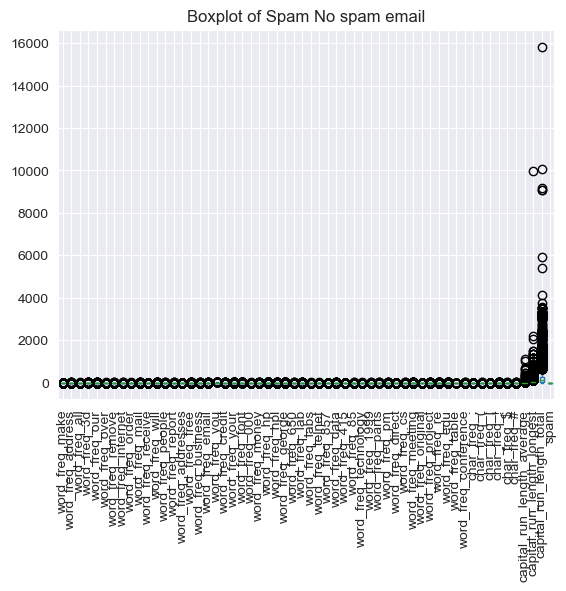

In [204]:
fig = plt.figure(figsize =(100, 50))
data_set.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

### Boxplot of capital_run_length_total with outliers

<AxesSubplot:xlabel='capital_run_length_total'>

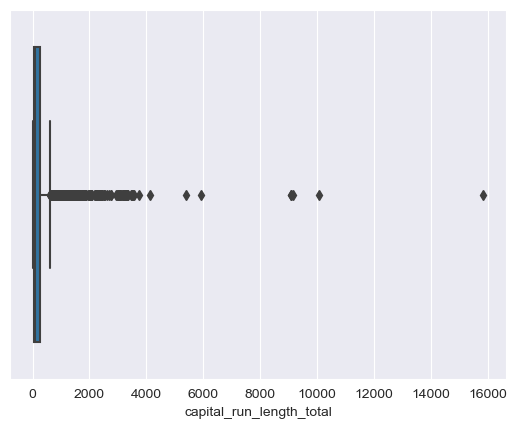

In [205]:
sns.boxplot(x = data_set['capital_run_length_total'])

### Boxplot of capital_run_length_longest with outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

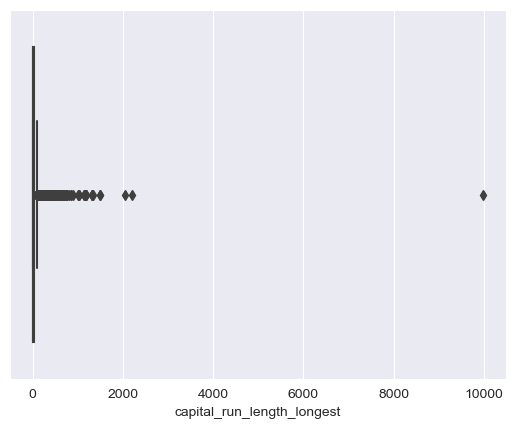

In [206]:
sns.boxplot(x = data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_average with outliers

<AxesSubplot:xlabel='capital_run_length_average'>

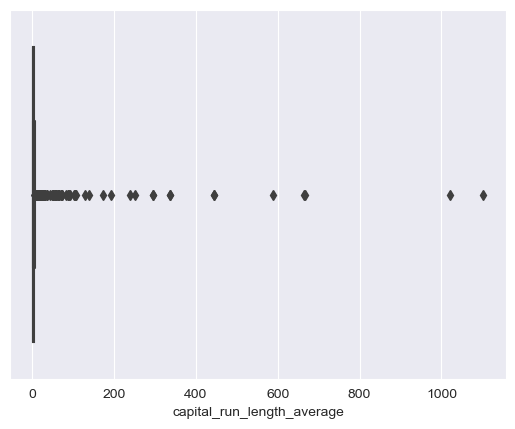

In [207]:
sns.boxplot(x = data_set['capital_run_length_average'])

### Removing outliers from IQR technique

In [208]:
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(data_set.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_set.loc[data_set[x] < min,x] = np.nan
    data_set.loc[data_set[x] > max,x] = np.nan

### Boxplot of capital_run_length_total without outliers

<AxesSubplot:xlabel='capital_run_length_total'>

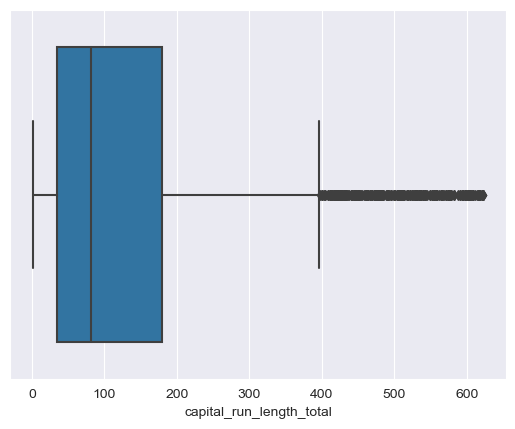

In [209]:
sns.boxplot(x = data_set['capital_run_length_total'])

### Boxplot of capital_run_length_longest without outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

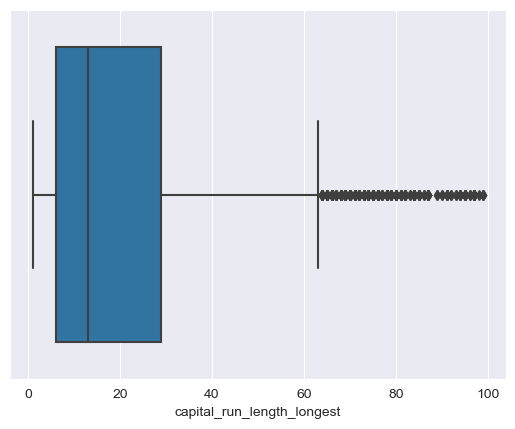

In [210]:
sns.boxplot(x = data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_average without outliers

<AxesSubplot:xlabel='capital_run_length_average'>

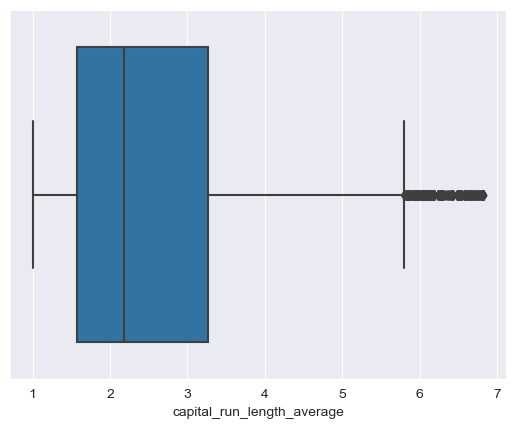

In [211]:
sns.boxplot(x = data_set['capital_run_length_average'])

### Finding the null values in the dataset

In [212]:
data_set.isna().sum().any()

True

In [213]:
data_set.isna().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [214]:
# Drop all rows with NaN values
df_two=data_set.dropna()
df_two=data_set.dropna(axis=0)

# Reset index after drop
df_two=data_set.dropna().reset_index(drop=True)

data_set = df_two
df_two

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


### Removing the target column 

In [215]:
data=data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0


In [216]:
# No of rows in dataset after preprocessing
print(len(data_set))

3446


<AxesSubplot:>

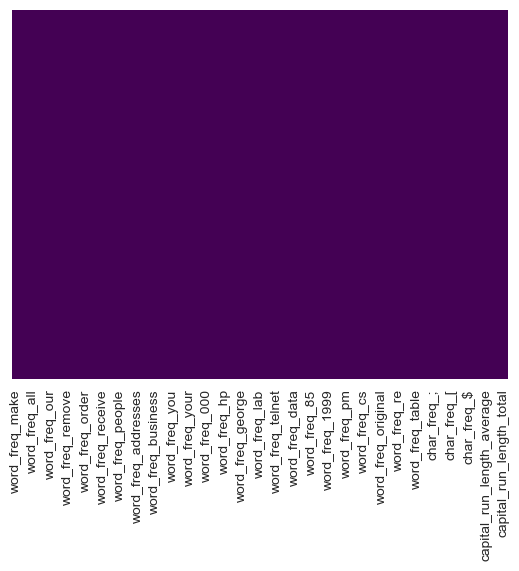

In [217]:
#graphically viewing whether null values available
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Summary of dataset before performing Standard Scaler

In [218]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


### Performing Standard Scaling for the dataset

In [219]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


### Summmary of dataset after performing Standard Scaling

In [220]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,1.906919e-15,-4.400459e-16,6.484785e-16,-5.201674e-16,-4.045146e-15,-1.406014e-15,-1.210717e-14,1.584065e-15,4.067150e-15,-7.056650e-16,...,2.352788e-15,2.911178e-15,1.163286e-15,-1.355787e-15,-9.867405e-16,4.202739e-15,3.410247e-17,8.189747e-17,6.437103e-17,-1.803871e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


# Performing PCA to the Dataset

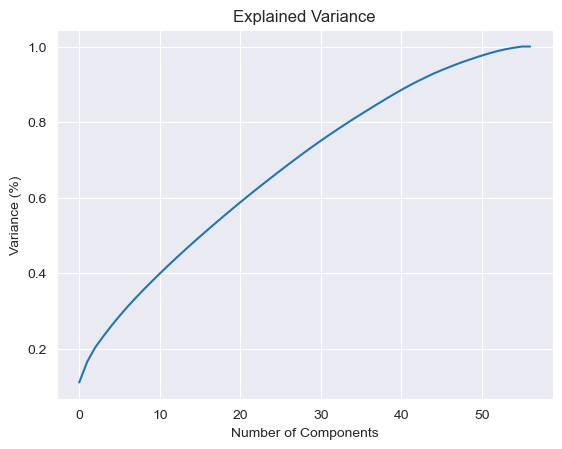

In [221]:
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Introducing the PCA components

In [222]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

### Dataset after performing PCA

In [223]:
# principal_Df
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-1.006857,1.802127,0.718562,0.075168,-0.217737,-0.059026,-1.193371,-0.853407,1.060751,0.868851,...,-0.118184,0.224863,0.058474,0.538323,-0.014599,0.162483,-0.109222,0.048222,-0.536700,-0.327752
1,-0.985097,1.538511,0.306309,-0.027401,-0.286973,-0.185208,-0.690159,0.208038,-0.357099,-0.198207,...,0.392079,-0.600650,0.334913,0.337797,-0.798781,0.297410,-0.137876,0.067423,0.329602,-0.569638
2,-0.986344,1.538194,0.305719,-0.026691,-0.287252,-0.184637,-0.690771,0.207169,-0.357372,-0.199754,...,0.391825,-0.599557,0.332429,0.340715,-0.799991,0.298734,-0.135573,0.066870,0.328968,-0.569208
3,-0.589457,-0.147059,-0.010503,0.294492,-0.672922,-0.410480,0.165879,0.739213,-1.294948,-0.065360,...,0.338266,-1.154014,1.043383,0.804659,-0.771603,1.211318,0.431491,-0.722544,0.290805,-0.601014
4,-1.147370,0.762969,-1.665203,0.687182,-0.063251,1.574988,-1.343563,-0.179046,-0.197739,-0.558008,...,1.885530,-0.336336,1.356590,-0.602164,0.108802,0.538321,0.397762,1.104701,-0.397634,0.412028


In [224]:
print(pca.explained_variance_)


[6.27759756 3.15144097 2.16980778 1.66017098 1.59211527 1.46548076
 1.40631178 1.31435968 1.26232538 1.22095715 1.20125143 1.16639544
 1.14251364 1.11554781 1.10047142 1.07448346 1.05813956 1.0445924
 1.03537503 1.01613965 1.0128165  0.99035332 0.97886319 0.9587258
 0.94603398 0.94152035 0.92774399 0.91089495 0.90401388 0.87347768
 0.86263192 0.837394   0.81820732 0.80176572 0.79137013 0.76600459
 0.75746968 0.7444784  0.73415476 0.72289716 0.70096591 0.6667599
 0.62742335 0.59384162]


In [225]:
print(pca.components_)

[[-0.0362469  -0.0082901  -0.04087849 ...  0.00769072 -0.04498994
  -0.0378591 ]
 [ 0.10473599  0.06979274  0.10340085 ...  0.34752525  0.37715026
   0.29949495]
 [-0.08995266 -0.04322259 -0.09566598 ...  0.31904498  0.26996566
   0.31890652]
 ...
 [-0.20840182  0.28778077 -0.04416687 ... -0.12174171 -0.04355314
   0.12921634]
 [-0.02948406  0.26680539  0.0318407  ... -0.01066101  0.02049135
   0.00045426]
 [-0.01501551  0.00683119  0.07284888 ... -0.04222847 -0.02392719
  -0.00876602]]


## Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [226]:
X = principal_Df.iloc[:,0:44].values
y = data_set.iloc[:, 57].values

### Splitting the dataset into the Training set and Test set

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Find optimal K value

In [228]:
# Perform grid search to find optimal value of k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print optimal value of k
print('Optimal value of k:', grid_search.best_params_['n_neighbors'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

Optimal value of k: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Perform 10-fold cross validation

In [229]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [230]:
# Fitting classifier to the Training set
#k =5 has been taken
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [231]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [232]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[427,  23],
       [ 62, 178]], dtype=int64)

In [233]:
# Generate summary of the prediction (Classification Report) made by the classifier
print('Classification Report : \n\n')
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       450
           1       0.89      0.74      0.81       240

    accuracy                           0.88       690
   macro avg       0.88      0.85      0.86       690
weighted avg       0.88      0.88      0.87       690



In [234]:
# Accuracy score of the prediction
print("Accuracy score of email prediction using KNN : ",accuracy_score(y_pred,y_test)*100) 

Accuracy score of email prediction using KNN :  87.68115942028986


### Visualization

Text(115.9222222222222, 0.5, 'predicted class')

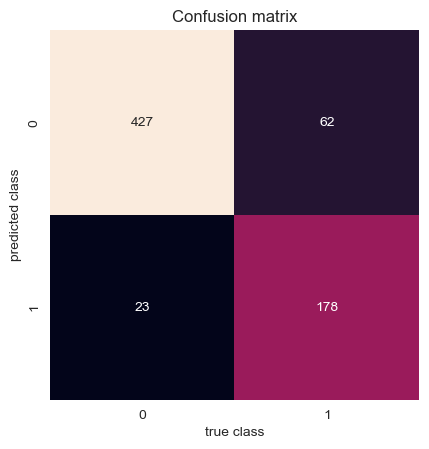

In [235]:
# based on test values generate the confusion matrix
import seaborn as sns

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

In [236]:
import plotly.express as px
fig = px.scatter(
    X_test, x=0, y=1,
    color=y_pred, color_continuous_scale='Viridis',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()